[[0 0 0 0 0 0]
 [1 2 0 0 0 1]
 [0 2 1 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 0 0]]


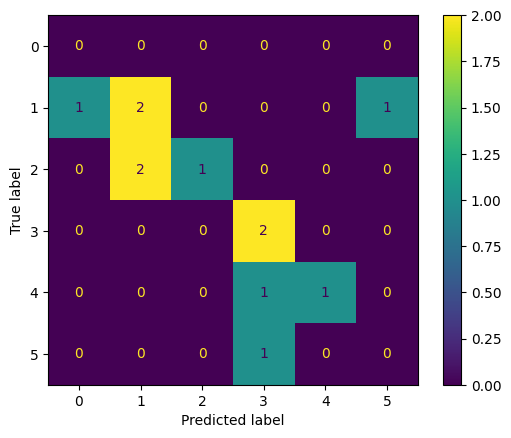

In [3]:
# Самое необходимое и нужное. Тут и происхожит обучение. В данном случает метод Деревья решений
 
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

df = pd.read_csv('microarray_BRCA_public.csv')
y = df.type
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
X = df.drop(df.columns[0], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1)
dict = { 1 : 'basal' , 3 : 'luminal_A', 4 : 'luminal_B', 0 : 'HER', 2 : 'cell_line', 5 : 'normal'}
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
result = list(map(dict.get, prediction))
y_test_cancer_type = list(map(dict.get, y_test))

print(clf.score(X_test, y_test))


In [ ]:
#Проверка как работает

print('Было', y_test_cancer_type, '\nстало', result)

In [10]:
# Кросс-валидация

from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print('Cross-validation scores:', scores)

Cross-validation scores: [0.75       0.70833333 0.625      0.66666667 0.79166667]


[[0 0 0 0 0 0]
 [1 2 0 0 0 1]
 [0 2 1 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 0 0]]


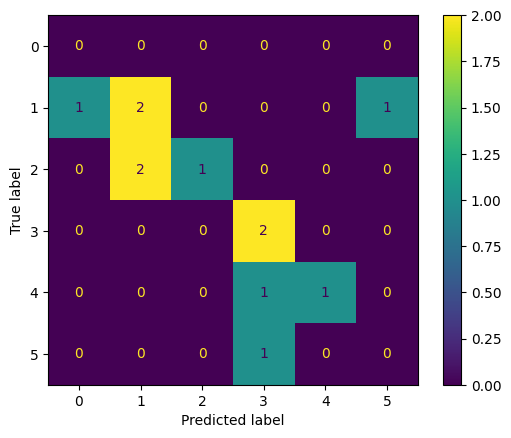

In [4]:
# Еще один метод проверки 

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)
print(cm)
vis = ConfusionMatrixDisplay(confusion_matrix=cm)
vis.plot()
plt.show()

In [31]:
# Самый базовый метод проверки 

print(clf.score(X_test, y_test))

0.75
